In [1]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set_theme(style="darkgrid", font_scale = 1.3, rc={'font.sans-serif':['Arial Unicode MS','Arial']})
from utils.color import team_color

### 得到所有先發球員的先發次數

In [15]:
from PStatsScraper.GameStatisticTable import GameStatisticTable

starter_player_table = pd.DataFrame([])
for game_num in tqdm(range(1, 87)):
    if game_num < 10 :
        game_number = f'G0{game_num}'
    else:
        game_number = f'G{game_num}'
    game_statistic_table = GameStatisticTable(season='2021-22',game_type='regular-season',game_number=game_number,english_col=True)
    for team_side in ['home','away']:
        table = game_statistic_table.get_table(team_side=team_side)
        table = table[table['starter'] == '〇']
        starter_player_table = pd.concat([starter_player_table, table])
starter_player_table.shape

100%|██████████| 86/86 [00:22<00:00,  3.83it/s]


(860, 24)

In [16]:
starter_count = starter_player_table[['player','starter']].groupby('player', as_index=False).count()
starter_count.head(3)


,player,starter
0,利多,1
1,吉倫,3
2,吉爾貝克,17


### 得到有最佳第六人資格的球員（出賽超過20場、替補超過75%）

In [17]:
from PStatsScraper.PlayerStatisticTable import PlayerStatisticTable
player_ststistic_table = PlayerStatisticTable(english_col=True)

season :  ['2020-21', '2021-22']
game_type :  ['例行賽', '季後賽', '總冠軍賽']
team :  ['全部球隊', '臺北富邦勇士', '新北國王', '桃園領航猿', '新竹街口攻城獅', '福爾摩沙台新夢想家', '高雄鋼鐵人']
stat_type :  ['平均', '累計']


In [18]:
col_dtype = {
    'games' : 'int32',
    '2PM' : 'int32',
    '2PA' : 'int32',
    '3PM' : 'int32',
    '3PA' : 'int32',
    'FTM' : 'int32',
    'FTA' : 'int32',
    'points' : 'int32',
    'REB_O' : 'int32',
    'REB_D' : 'int32',
    'REB' : 'int32',
    'AST' : 'int32',
    'STL' : 'int32',
    'BLK' : 'int32',
    'TO' : 'int32',
    'PF' : 'int32'
}
def calaulate_alt_rate(row):
    return 1 - (row['starter'] / int(row['games']))
def sixth_candidate(df):
    df = df[df['games'] >= 20]
    df['alt_rate'] = df.apply(calaulate_alt_rate, axis=1)
    df = df[df['alt_rate'] > 0.75]
    return df

sixth_candidate_table = (
    player_ststistic_table.get_table(season='2021-22',game_type='例行賽',team='全部球隊',stat_type='累計')
        .astype(col_dtype)
        .join(starter_count.set_index('player'), on='player', how='left')
        .pipe(sixth_candidate)
        .sort_values(by = ['points', 'AST'],ascending = False)
)

sixth_candidate_table

/Users/whchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,player,jersey,team,games,mins,2PM,2PA,2P%,3PM,3PA,...,REB_O,REB_D,REB,AST,STL,BLK,TO,PF,starter,alt_rate
24,盧峻翔,69,桃園領航猿,22,653:46,62,147,42.18,57,160,...,14,83,97,34,37,5,46,40,4.0,0.818182
27,簡浩,21,福爾摩沙台新夢想家,29,806:31,26,55,47.27,75,211,...,34,90,124,68,34,9,37,50,3.0,0.896552
41,林志傑,12,臺北富邦勇士,26,585:51,54,86,62.79,42,135,...,29,100,129,77,11,3,46,31,4.0,0.846154
51,簡祐哲,10,新北國王,28,512:02,31,60,51.67,40,112,...,9,29,38,15,14,3,20,54,1.0,0.964286
44,李德威,26,福爾摩沙台新夢想家,25,549:46,43,107,40.19,19,92,...,16,105,121,43,17,24,65,76,4.0,0.840000
48,陳堅恩,6,新竹街口攻城獅,25,482:00,20,46,43.48,31,88,...,5,47,52,34,12,4,29,70,1.0,0.960000
58,石博恩,23,臺北富邦勇士,22,365:04,35,67,52.24,18,51,...,30,97,127,11,14,12,19,39,2.0,0.909091
63,蔡文誠,14,臺北富邦勇士,30,444:52,47,113,41.59,12,32,...,28,82,110,38,21,1,22,25,6.0,0.800000
59,盧哲毅,15,高雄鋼鐵人,26,429:51,14,38,36.84,31,99,...,15,65,80,32,21,3,24,46,4.0,0.846154
47,王律翔,8,高雄鋼鐵人,23,453:38,23,54,42.59,27,90,...,14,20,34,20,10,1,26,38,1.0,0.956522


In [19]:
sixth_candidate_table[['team','jersey','player']]

,team,jersey,player
24,桃園領航猿,69,盧峻翔
27,福爾摩沙台新夢想家,21,簡浩
41,臺北富邦勇士,12,林志傑
51,新北國王,10,簡祐哲
44,福爾摩沙台新夢想家,26,李德威
48,新竹街口攻城獅,6,陳堅恩
58,臺北富邦勇士,23,石博恩
63,臺北富邦勇士,14,蔡文誠
59,高雄鋼鐵人,15,盧哲毅
47,高雄鋼鐵人,8,王律翔


### 以基礎數據：1.進攻數據、2.防守數據 來看

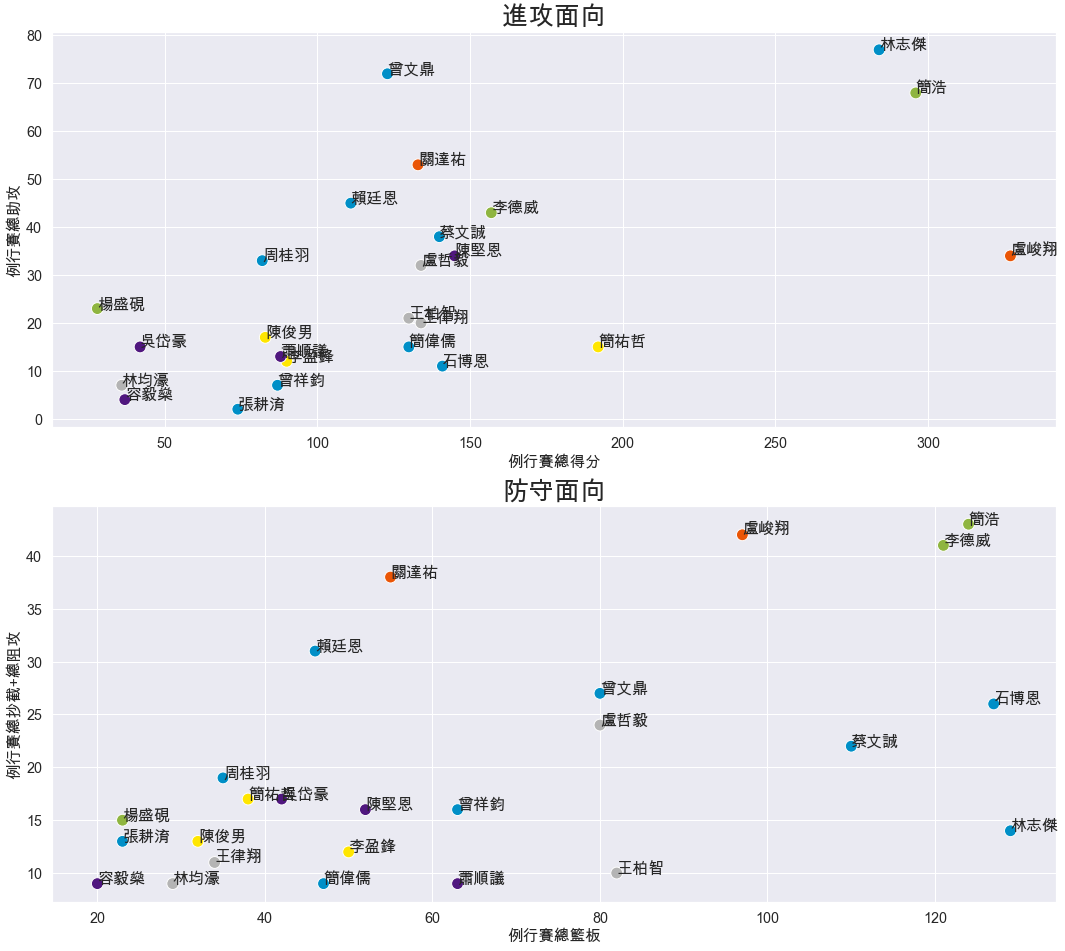

In [180]:
sixth_candidate_table['STL+BLK'] = sixth_candidate_table['STL'] + sixth_candidate_table['BLK']
fig, ax = plt.subplots(2, 1,figsize=(18,16))

sns.scatterplot(data=sixth_candidate_table, x='points', y='AST', hue='team', ax=ax[0], s=140, palette=team_color)
ax[0].set_xlabel('例行賽總得分')
ax[0].set_ylabel('例行賽總助攻')
ax[0].set_title('進攻面向',fontsize = 26)
ax[0].legend([],[], frameon=False)
annotations = list(sixth_candidate_table['player'])
for i, label in enumerate(annotations):
    ax[0].annotate(label, (sixth_candidate_table.iloc[i]['points'], sixth_candidate_table.iloc[i]['AST']), fontsize = 16)


sns.scatterplot(data=sixth_candidate_table, x='REB', y='STL+BLK', hue='team', ax=ax[1], s=140, palette=team_color)
ax[1].set_xlabel('例行賽總籃板')
ax[1].set_ylabel('例行賽總抄截+總阻攻')
ax[1].set_title('防守面向',fontsize = 26)
ax[1].legend([],[], frameon=False)
annotations = list(sixth_candidate_table['player'])
for i, label in enumerate(annotations):
    ax[1].annotate(label, (sixth_candidate_table.iloc[i]['REB'], sixth_candidate_table.iloc[i]['STL+BLK']), fontsize = 16)


### 進階數據

In [45]:
refined_player = ['盧峻翔','林志傑','簡浩','簡祐哲','曾文鼎']

In [46]:
# calcuate TS, EFG

from utils.advanceStats import TS, EFG
def TS_for_apply(row):
    return TS(row['points'],row['2PA']+row['3PA'],row['FTA'])
def EFG_for_apply(row):
    return EFG(row['points'],row['2PA']+row['3PA'])

refined_sixth_candidate_table = sixth_candidate_table[sixth_candidate_table['player'].isin(refined_player)]
refined_sixth_candidate_table['TS'] = refined_sixth_candidate_table.apply(TS_for_apply, axis = 1)
refined_sixth_candidate_table['EFG'] = refined_sixth_candidate_table.apply(EFG_for_apply, axis = 1)
refined_sixth_candidate_table[['team','player','points','AST','TS','EFG']]

/Users/whchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,team,player,points,AST,TS,EFG
24,桃園領航猿,盧峻翔,327,34,0.50,0.53
27,福爾摩沙台新夢想家,簡浩,296,68,0.54,0.56
41,臺北富邦勇士,林志傑,284,77,0.56,0.64
51,新北國王,簡祐哲,192,15,0.54,0.56
43,臺北富邦勇士,曾文鼎,123,72,0.46,0.50


In [26]:
# calcuate USG (need to calcualte USG in every game)

from PStatsScraper.GameStatisticTable import GameStatisticTable
from utils.advanceStats import USG

USG_table = pd.DataFrame([])
for game_num in tqdm(range(1, 87)):
    if game_num < 10 :
        game_number = f'G0{game_num}'
    else:
        game_number = f'G{game_num}'
    game_statistic_table = GameStatisticTable(season='2021-22',game_type='regular-season',game_number=game_number,english_col=True)
    for team_side in ['home','away']:
        table = game_statistic_table.get_table(team_side=team_side)
        # find intersection
        intersection = list(set(refined_player) & set(table['player']))
        if len(intersection) > 0:
            for player in intersection:
                self_table = table[(table['player'] == player)].iloc[0]
                if self_table['mins'] == 'DNP':
                    continue
                self_stats = {
                    'FGA': int(self_table['2P'].split('-')[-1]) + int(self_table['3P'].split('-')[-1]),
                    'FTA' : int(self_table['FT'].split('-')[-1]),
                    'TO' : int(self_table['TO']),
                    'mins' : float(self_table['mins'].split(':')[0]) + float(self_table['mins'].split(':')[1])/60
                }
                team_table = table[(table['player'] == 'Total')].iloc[0]
                team_stats = {
                    'FGA': int(team_table['2P'].split('-')[-1]) + int(team_table['3P'].split('-')[-1]),
                    'FTA' : int(team_table['FT'].split('-')[-1]),
                    'TO' : int(team_table['TO']),
                    'mins' : float(team_table['mins'].split(':')[0]) + float(team_table['mins'].split(':')[1])/60
                }
                usg = USG(self_stats, team_stats)
                USG_table = pd.concat([USG_table, pd.DataFrame([[player, usg]], columns=['player','USG'])])
        
USG_table

100%|██████████| 86/86 [00:22<00:00,  3.89it/s]


,player,USG
0,林志傑,0.28
0,簡浩,0.17
0,簡浩,0.25
0,簡祐哲,0.18
0,盧峻翔,0.22
...,...,...
0,簡祐哲,0.28
0,盧峻翔,0.23
0,簡浩,0.23
0,簡祐哲,0.14


In [47]:
avg_USG_table = USG_table.groupby(by='player').mean()
avg_USG_table

,USG
player,
曾文鼎,0.147500
林志傑,0.230833
盧峻翔,0.254286
簡浩,0.171429
簡祐哲,0.165185


In [48]:
refined_sixth_candidate_table = refined_sixth_candidate_table[['player','team','points','AST','TS','EFG']].join(avg_USG_table, on='player', how='left')

Text(0, 0.5, '')

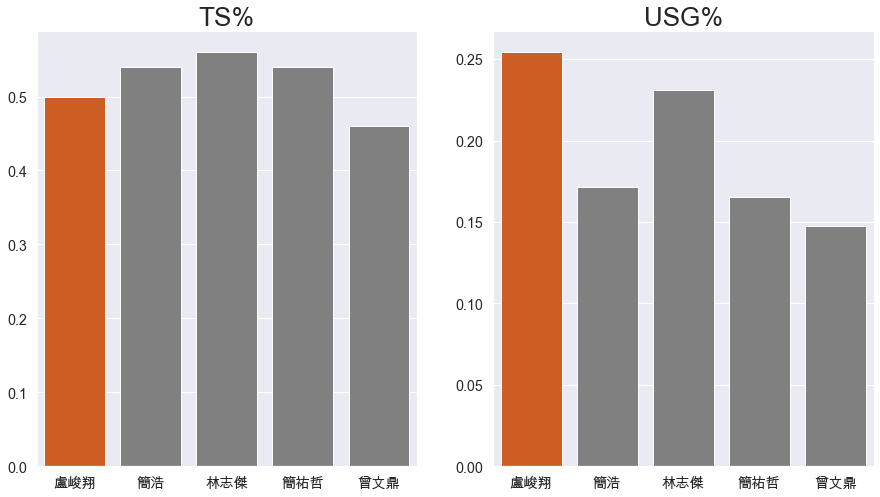

In [49]:
refined_sixth_candidate_table['color'] = refined_sixth_candidate_table['team'].map(team_color)
player_color = dict()
for i in range(len(refined_sixth_candidate_table)):
    row = refined_sixth_candidate_table.iloc[i]
    if row['player'] == '盧峻翔':
        player_color[row['player']] = row['color']
    else:
        player_color[row['player']] = 'grey'
fig, ax = plt.subplots(1, 2,figsize=(15,8))

sns.barplot(data=refined_sixth_candidate_table, x='player', y='TS', ax=ax[0], palette=player_color)
ax[0].set_title('TS%',fontsize = 26)
ax[0].legend([],[], frameon=False)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data=refined_sixth_candidate_table, x='player', y='USG', ax=ax[1], palette=player_color)
ax[1].set_title('USG%',fontsize = 26)
ax[1].legend([],[], frameon=False)
ax[1].set_xlabel('')
ax[1].set_ylabel('')